<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°09

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [4]:
#conjuto de los datos numéricos
datonumerico=df[['desplazamiento','co2','consumo_litros_milla']]
###relleno de los datos numéricos con el promedio
datonumerico = datonumerico.fillna(datonumerico.mean());

In [5]:
#normalización de los datos numéricos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['desplazamiento', 'co2','consumo_litros_milla']
datonumerico[columns] = scaler.fit_transform(datonumerico[columns])


In [6]:
datocategorico=df[['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo']]
df1=pd.get_dummies(datocategorico['clase_tipo'])
df2=pd.get_dummies(datocategorico['traccion_tipo'])
df3=pd.get_dummies(datocategorico['transmision_tipo'])
df4=pd.get_dummies(datocategorico['combustible_tipo'])
df5=pd.get_dummies(datocategorico['tamano_motor_tipo'])
df6=pd.get_dummies(datocategorico['consumo_tipo'])
df7=pd.get_dummies(datocategorico['co2_tipo'])
frame=[datonumerico,df1,df2,df3,df4,df5,df6,df7]
df_procesado=pd.concat(frame,axis=1)
### nuevo dataframe procesado
df_procesado.head()

,desplazamiento,co2,consumo_litros_milla,Camionetas,Coche Familiar,Coches Grandes,Coches Medianos,Coches pequeños,Deportivos,Furgoneta,...,alto,bajo,moderado,muy alto,muy bajo,alto,bajo,moderado,muy alto,muy bajo
0,-0.604304,0.417224,0.426558,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.645798,1.770818,1.783535,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.604304,0.692173,0.702194,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.645798,1.770818,1.783535,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.351656,0.692173,0.702194,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


El comando get_dummies, consisten en relizar n columnas con n valores únicos (string) de los datos de esta.

## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [10]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(df_procesado)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [11]:
# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

In [12]:
#nuevo data frame con los clusters
df_procesado.head()

,desplazamiento,co2,consumo_litros_milla,Camionetas,Coche Familiar,Coches Grandes,Coches Medianos,Coches pequeños,Deportivos,Furgoneta,...,bajo,moderado,muy alto,muy bajo,alto,bajo,moderado,muy alto,muy bajo,cluster
0,-0.604304,0.417224,0.426558,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1,0.645798,1.770818,1.783535,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2,-0.604304,0.692173,0.702194,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,0.645798,1.770818,1.783535,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
4,0.351656,0.692173,0.702194,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2


In [13]:
#centroides para los clusters
centroids_df.head()

,desplazamiento,co2,consumo_litros_milla,Camionetas,Coche Familiar,Coches Grandes,Coches Medianos,Coches pequeños,Deportivos,Furgoneta,...,bajo,moderado,muy alto,muy bajo,alto,bajo,moderado,muy alto,muy bajo,cluster
0,-0.123006,-0.038308,-0.034527,0.176314,0.083903,0.085405,0.132611,0.187823,0.177314,0.067389,...,2.118432e-02,9.788157e-01,-1.776357e-15,-5.578871e-15,4.003336e-03,3.336113e-04,0.995663,-2.997602e-15,-1.526557e-15,1
1,-0.620371,-1.048471,-1.062316,0.041344,0.065116,0.032558,0.264599,0.382429,0.201550,0.006718,...,2.067183e-03,8.326673e-16,-8.326673e-16,9.979328e-01,5.551115e-16,3.875969e-02,0.009302,9.436896e-16,9.519380e-01,2
2,0.603537,0.537899,0.537186,0.303005,0.017441,0.046438,0.049380,0.150242,0.236604,0.087413,...,4.622820e-03,4.517756e-02,4.202564e-04,-5.190293e-15,9.815087e-01,4.622820e-03,0.000630,1.323808e-02,1.026956e-15,3
3,0.460918,1.232686,1.246947,0.281671,0.005104,0.021346,0.031090,0.134107,0.206032,0.163341,...,3.025358e-15,1.831868e-15,9.986079e-01,-3.080869e-15,9.280742e-04,6.938894e-16,0.000928,9.981439e-01,2.053913e-15,4
4,0.110206,-0.043102,-0.043972,0.011154,0.083414,0.092871,0.191562,0.540252,0.076625,0.000727,...,4.097963e-02,9.534433e-01,-2.997602e-15,5.092144e-03,1.260912e-02,4.849661e-04,0.986906,-3.802514e-15,7.494005e-16,5


In [14]:
#cálculo de las medias geométricas
df_procesado.groupby(['cluster']).mean()

,desplazamiento,co2,consumo_litros_milla,Camionetas,Coche Familiar,Coches Grandes,Coches Medianos,Coches pequeños,Deportivos,Furgoneta,...,alto,bajo,moderado,muy alto,muy bajo,alto,bajo,moderado,muy alto,muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.123006,-0.038308,-0.034527,0.176314,0.083903,0.085405,0.132611,0.187823,0.177314,0.067389,...,0.000000,0.021184,0.978816,0.000000,0.000000,0.004003,0.000334,0.995663,0.000000,0.000000
1,-0.620371,-1.048471,-1.062316,0.041344,0.065116,0.032558,0.264599,0.382429,0.201550,0.006718,...,0.000000,0.002067,0.000000,0.000000,0.997933,0.000000,0.038760,0.009302,0.000000,0.951938
2,0.603537,0.537899,0.537186,0.303005,0.017441,0.046438,0.049380,0.150242,0.236604,0.087413,...,0.949779,0.004623,0.045178,0.000420,0.000000,0.981509,0.004623,0.000630,0.013238,0.000000
3,0.460918,1.232686,1.246947,0.281671,0.005104,0.021346,0.031090,0.134107,0.206032,0.163341,...,0.001392,0.000000,0.000000,0.998608,0.000000,0.000928,0.000000,0.000928,0.998144,0.000000
4,0.110206,-0.043102,-0.043972,0.011154,0.083414,0.092871,0.191562,0.540252,0.076625,0.000727,...,0.000485,0.040980,0.953443,0.000000,0.005092,0.012609,0.000485,0.986906,0.000000,0.000000
5,-0.571218,-0.559710,-0.554160,0.058171,0.096359,0.045990,0.154804,0.450041,0.144402,0.007528,...,0.000411,0.980838,0.000000,0.000000,0.018752,0.000000,0.991514,0.007665,0.000000,0.000821
6,1.672070,1.696925,1.677092,0.356898,0.003232,0.042214,0.041810,0.140376,0.134316,0.195314,...,0.052515,0.000000,0.013129,0.934357,0.000000,0.002626,0.000000,0.000000,0.997374,0.000000
7,-1.165516,-1.274225,-1.267395,0.002695,0.134028,0.012037,0.094143,0.705354,0.041322,0.000180,...,0.000000,0.000000,0.000180,0.000000,0.999820,0.000000,0.006288,0.000000,0.000000,0.993712


In [15]:
df_procesado.describe()

,desplazamiento,co2,consumo_litros_milla,Camionetas,Coche Familiar,Coches Grandes,Coches Medianos,Coches pequeños,Deportivos,Furgoneta,...,alto,bajo,moderado,muy alto,muy bajo,alto,bajo,moderado,muy alto,muy bajo
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,...,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000
mean,4.944115e-17,-3.460881e-16,3.708086e-16,0.147835,0.068848,0.049931,0.115816,0.353538,0.143758,0.060096,...,0.130141,0.203528,0.274007,0.184284,0.208040,0.129434,0.200593,0.275013,0.194395,0.200565
std,1.000014e+00,1.000014e+00,1.000014e+00,0.354941,0.253200,0.217805,0.320009,0.478074,0.350849,0.237668,...,0.336463,0.402627,0.446019,0.387721,0.405911,0.335684,0.400449,0.446527,0.395740,0.400429
min,-2.001476e+00,-3.737915e+00,-2.690981e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.249099e-01,-7.303882e-01,-7.239231e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.366269e-01,-6.046343e-02,-3.767144e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.193331e-01,6.921729e-01,4.265577e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.734284e+00,6.701768e+00,6.726810e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_procesado.value_counts(df_procesado['cluster'])

cluster
5    7306
0    5995
7    5566
6    4951
2    4759
4    4124
3    2155
1    1935
dtype: int64

La moda es el cluster N°5, pero python considera las lista desde el 0 y como la lista con los clusters es [1,2,3,4,5,6,7,8], l cluster general corresponde al N°6.

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [17]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,145721.203419
1,10,99927.492835
2,20,78362.308891
3,30,67005.708534
4,50,53462.458378


In [18]:
print(df_Elbow)

   Number of Clusters          Score
0                   5  145721.203419
1                  10   99927.492835
2                  20   78362.308891
3                  30   67005.708534
4                  50   53462.458378
5                  75   43688.338224
6                 100   36998.746117
7                 200   22736.130101
8                 300   15516.258326


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

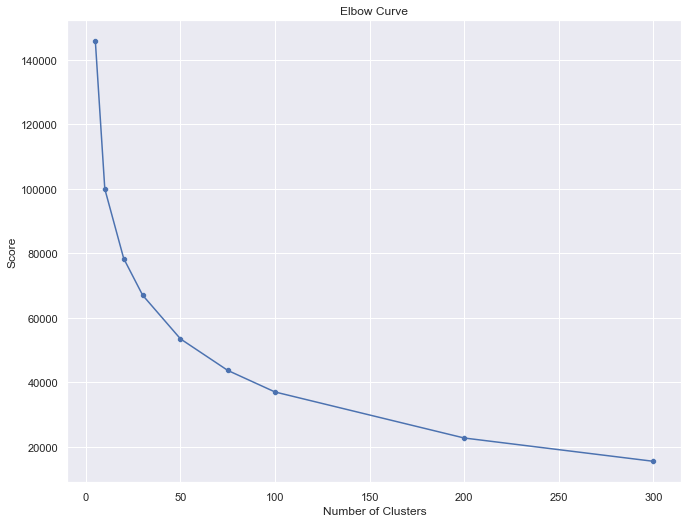

In [19]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

El motivo de usar la regla del codo es determinar mediante una impección visual la candidad "óptica" del número de Clusters, para esto se debe observar las pendientes y seleccionar el Cluster, donde la pendiente comience a no ser tan pronunciada. por ejemplo, en los cluster más bajos la pendiente es muy inclinada pero a medida que se aumenta el número, la pendiente tiene a ser más horizontal. 
observando el grafico anterior, el número óptimo de clusters es 100.